In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Flatten the 28x28 images into 784-dim vectors
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

In [4]:
# Define encoding dimension (compressed representation size)
encoding_dim = 32

In [5]:
# Build encoder
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Build decoder
decoded = Dense(784, activation='sigmoid')(encoded)

In [6]:
# Autoencoder model
autoencoder = Model(input_img, decoded)

In [7]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3785 - val_loss: 0.1896
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1792 - val_loss: 0.1523
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1485 - val_loss: 0.1337
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1317 - val_loss: 0.1215
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1201 - val_loss: 0.1134
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1134 - val_loss: 0.1080
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1082 - val_loss: 0.1042
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1045 - val_loss: 0.1010
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1013 - val_loss: 0.0982
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0989 - val_loss: 0.0962
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0972 - val_loss: 0.0950
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


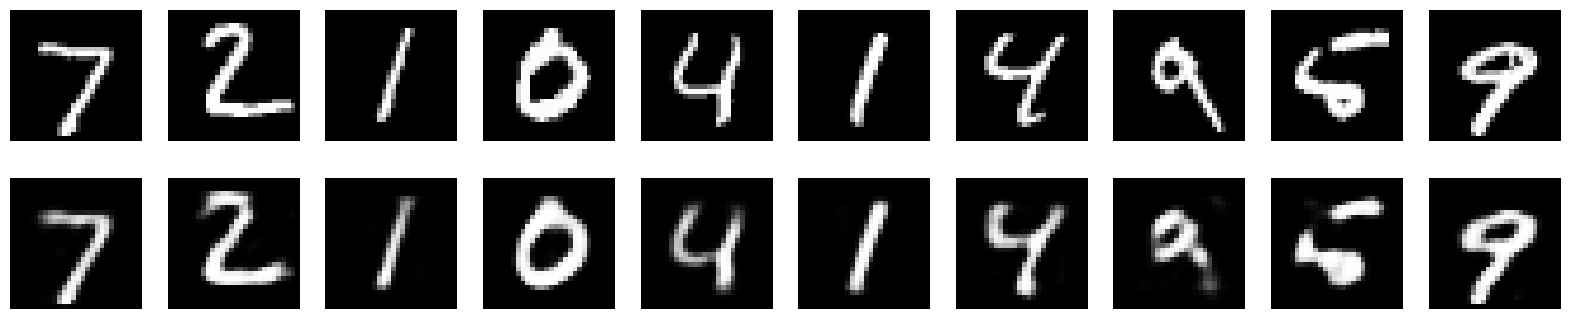

In [9]:
# Encode and decode the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

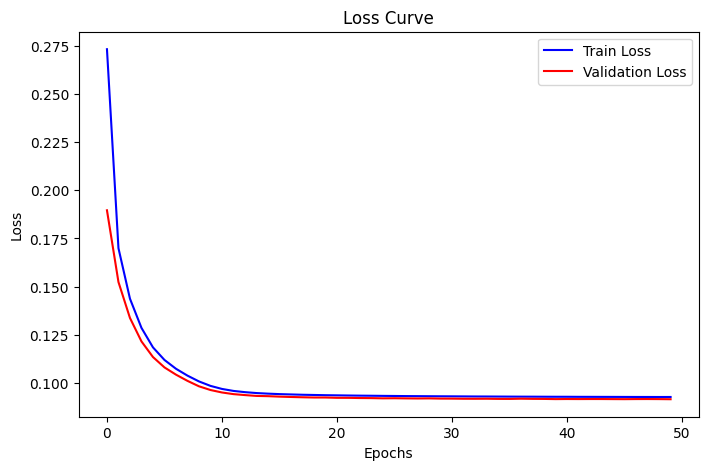

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()
